In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("salary_data_cleaned.csv")

In [4]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Avg_salary,company_txt,job_state,same_state,age,python_yn,spark,aws,excel,R_Studio
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Researc,NM,0,47,1,0,0,1,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical Syste,MD,0,36,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe,FL,1,10,1,1,0,1,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNN,WA,1,55,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solution,NY,1,22,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,84.5,GS,MA,0,190,0,0,1,0,0
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,102.5,Eventbrit,TN,0,14,1,1,1,0,0
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,73.5,Software Engineering Institut,PA,1,36,0,0,0,1,0
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,127.5,"Numeric, LL",PA,0,-1,0,0,0,1,0


In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'Avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'spark',
       'aws', 'excel', 'R_Studio'],
      dtype='object')

In [7]:
df=df.drop("Unnamed: 0",axis=1)

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'Avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'spark',
       'aws', 'excel', 'R_Studio'],
      dtype='object')

Make the data look more familier

In [9]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [11]:
df["Job_simplifier"]=df["Job Title"].apply(title_simplifier)

In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,spark,aws,excel,R_Studio,Job_simplifier
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Researc,NM,0,47,1,0,0,1,0,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical Syste,MD,0,36,1,0,0,0,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe,FL,1,10,1,1,0,1,0,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNN,WA,1,55,1,0,0,0,0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solution,NY,1,22,1,0,0,1,0,data scientist


In [15]:
df.Job_simplifier.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: Job_simplifier, dtype: int64

In [16]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
GA      6
MI      6
KY      6
DE      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [17]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [18]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [19]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [22]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [23]:
df['company_txt']

0                          Tecolote Researc
1      University of Maryland Medical Syste
2                                    KnowBe
3                                       PNN
4                         Affinity Solution
                       ...                 
737                                      GS
738                               Eventbrit
739           Software Engineering Institut
740                             Numeric, LL
741             Riverside Research Institut
Name: company_txt, Length: 742, dtype: object

The describe() method shows a summary of the numerical attributes.

In [24]:
df.describe()

,Rating,Founded,Hourly,Employer_provided,min_salary,max_salary,Avg_salary,same_state,age,python_yn,spark,aws,excel,R_Studio,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.225067,0.237197,0.522911,0.002695,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.417908,0.425651,0.499812,0.051882,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'Avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'spark',
       'aws', 'excel', 'R_Studio', 'Job_simplifier', 'desc_len', 'num_comp'],
      dtype='object')

In [26]:
df.corr()

,Rating,Founded,Hourly,Employer_provided,min_salary,max_salary,Avg_salary,same_state,age,python_yn,spark,aws,excel,R_Studio,desc_len,num_comp
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.007825,0.027668,0.013492,0.085033,0.021655,0.144665,0.156982,0.117049,-0.036466,-0.004472,-0.012281,0.027190
Founded,0.332927,1.000000,0.049313,-0.312761,-0.038513,0.001069,-0.015149,0.171512,0.134682,0.103183,0.066978,-0.011123,-0.035567,0.016045,0.083119,0.191265
Hourly,-0.019531,0.049313,1.000000,0.124748,-0.309674,-0.379516,-0.356082,-0.067351,0.007626,-0.193487,-0.098530,-0.030315,-0.099897,-0.009505,-0.073194,-0.117265
Employer_provided,-0.468234,-0.312761,0.124748,1.000000,0.164277,0.014773,0.076287,-0.081349,-0.109288,-0.107924,-0.082524,-0.000685,0.074129,-0.007961,-0.102218,-0.116665
min_salary,-0.007825,-0.038513,-0.309674,0.164277,1.000000,0.944186,0.980031,-0.045114,0.001705,0.339425,0.171094,0.168418,-0.062074,-0.040105,0.069666,0.086887
max_salary,0.027668,0.001069,-0.379516,0.014773,0.944186,1.000000,0.990833,-0.026738,0.031403,0.312443,0.176259,0.169494,-0.052674,-0.039019,0.083228,0.096386
Avg_salary,0.013492,-0.015149,-0.356082,0.076287,0.980031,0.990833,1.000000,-0.034641,0.019655,0.327796,0.176559,0.171379,-0.057252,-0.040000,0.078808,0.093813
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.045114,-0.026738,-0.034641,1.000000,-0.166680,0.006975,-0.053139,-0.065070,0.106026,-0.058407,0.062387,-0.102635
age,0.021655,0.134682,0.007626,-0.109288,0.001705,0.031403,0.019655,-0.166680,1.000000,-0.099160,-0.102788,-0.033081,0.039033,-0.016533,0.163911,0.126687
python_yn,0.144665,0.103183,-0.193487,-0.107924,0.339425,0.312443,0.327796,0.006975,-0.099160,1.000000,0.347619,0.203221,-0.021519,0.049124,0.019143,0.091470


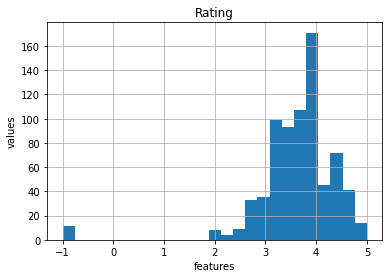

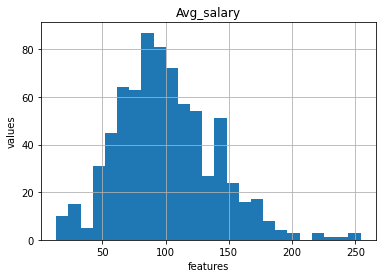

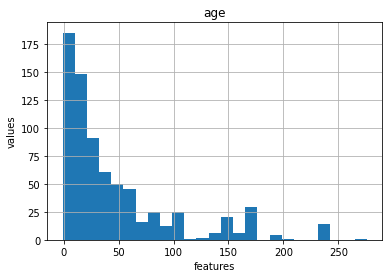

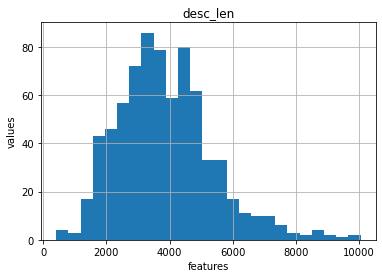

In [31]:
for features in df[["Rating","Avg_salary","age","desc_len"]]:
    data=df.copy()
    data[features].hist(bins=25)
    plt.xlabel('features')
    plt.ylabel('values')
    plt.title(features)
    plt.show()
    
    

C:\Users\computer\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


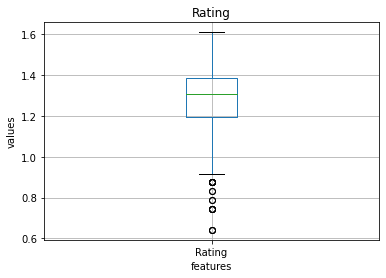

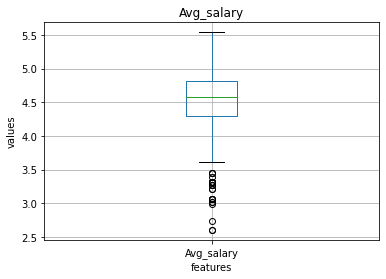

C:\Users\computer\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


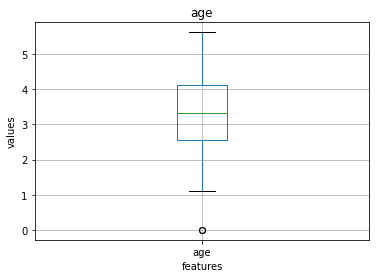

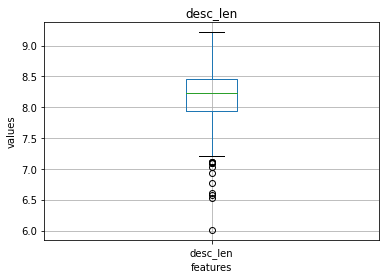

In [37]:
for features in df[["Rating","Avg_salary","age","desc_len"]]:
    data=df.copy()
    data[features]=np.log(data[features])
    data.boxplot(column=features)
    plt.xlabel('features')
    plt.ylabel('values')
    plt.title(features)
    plt.show()

# Correlation between Features

In [46]:
df1=df[['age','Avg_salary','Rating','desc_len','num_comp']].corr()

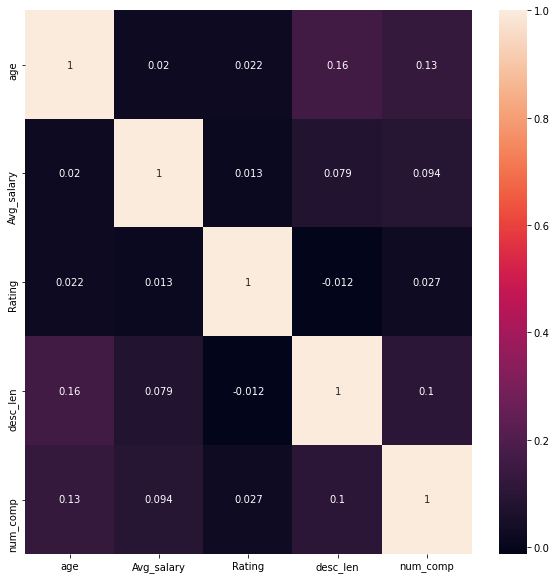

In [50]:
corr=df1.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_features].corr(),annot=True)

# Jobs collected in different state and salary 

graph for job_state: total = 20


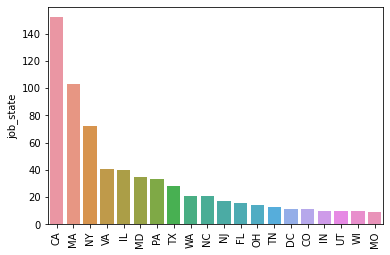

graph for Location: total = 20


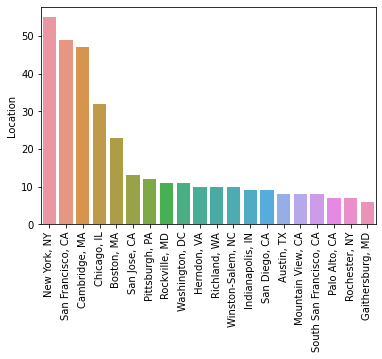

graph for Headquarters: total = 20


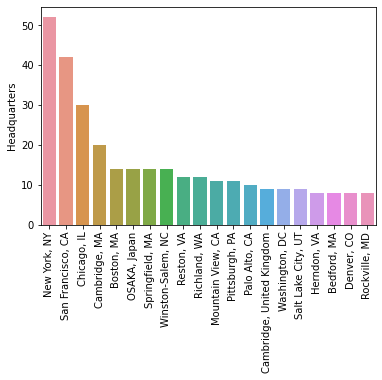

graph for company_txt: total = 20


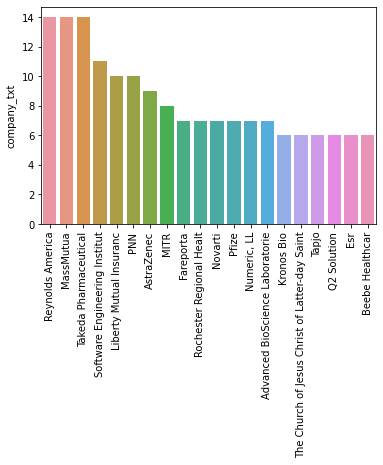

In [73]:
for i in df[['job_state','Location','Headquarters','company_txt',]].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'Avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'spark',
       'aws', 'excel', 'R_Studio', 'Job_simplifier', 'desc_len', 'num_comp'],
      dtype='object')

# Finding the value counts for the various Data Science Jobs and Average Salary display in the columns

In [60]:
pd.pivot_table(df, index = 'Job_simplifier', values = 'Avg_salary')

,Avg_salary
Job_simplifier,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


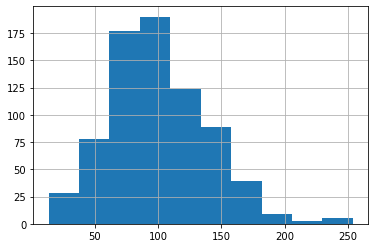

In [64]:
df.Avg_salary.hist()